# **Minicurso: Introdução à Análise de Dados com Python**

Neste minicurso, você aprenderá como utilizar a linguagem de programação Python para automatizar análises de dados e criar gráficos de forma rápida e eficiente, aplicando os conhecimentos diretamente em uma base de dados real.

## **Introdução**

### Tipos de dados


* **Números Inteiros (`int`):** São números sem casas decimais.
    * *Exemplo:* `idade = 30`, `tamanho_chave = 2048`

In [115]:
numero_de_chaves = 2048
print(f"Número de chaves: {numero_de_chaves}, Tipo: {type(numero_de_chaves)}")

Número de chaves: 2048, Tipo: <class 'int'>


* **Números Decimais (`float`):** São números com casas decimais.
    * *Exemplo:* `temperatura = 23.5`, `pi = 3.14159`
    * *No nosso caso:* Os tempos de execução (`Mean_Time`) e o desvio padrão (`Stddev_Time`) são floats, pois representam medidas contínuas.

In [116]:
tempo_em_ms = 45.789
print(f"Tempo em milissegundos: {tempo_em_ms}, Tipo: {type(tempo_em_ms)}")

Tempo em milissegundos: 45.789, Tipo: <class 'float'>


* **Textos (`str` - string):** São sequências de caracteres, ou seja, palavras, frases, nomes. Sempre vêm entre aspas simples ou duplas.
    * *Exemplo:* `nome = "Maria"`, `mensagem = 'Olá mundo!'`
    * *No nosso caso:* Os nomes das bibliotecas ("OpenSSL", "Pycryptodome") e o tipo de operação ("Cifração", "Decifração") são strings.

In [117]:
nome_biblioteca = "OpenSSL"
operacao = "Cifração"
print(f"Nome da biblioteca: {nome_biblioteca}, Tipo: {type(nome_biblioteca)}")
print(f"Operação: {operacao}, Tipo: {type(operacao)}")

Nome da biblioteca: OpenSSL, Tipo: <class 'str'>
Operação: Cifração, Tipo: <class 'str'>


### Data Frames

* **O que é um DataFrame?**
    * Imagine uma **planilha do Excel** ou uma **tabela de banco de dados** dentro do Python. Essa é a melhor analogia para um **DataFrame**.
    * Ele tem **linhas** (cada observação ou registro) e **colunas** (cada tipo de informação, como "Biblioteca", "Tempo Médio", "Tamanho da Chave").
    * Cada coluna de um DataFrame geralmente contém dados do mesmo **tipo** (por exemplo, uma coluna inteira de `float` para tempos, outra de `str` para nomes de bibliotecas).

* **Como veremos um DataFrame (Exemplo no Notebook):**
    * Você verá comandos como `df.head()` para mostrar as primeiras linhas da sua "tabela".
    * Verá `df.info()` para entender quais tipos de dados cada coluna contém e se há valores faltando.



---



## **Análise de dados dos processos de cifração, decifração e geração de chaves do RSA**

A base de dados, organizada pelos arquivos `cifracao_rsa.csv`, `decifracao_rsa.csv` e `geracao_chaves_rsa.csv`, é composta por execuções de implementações do algoritmo RSA em seis linguagens de programação: `C`, `C++`, `Java`, `JavaScript`, `Python` e `Rust`. Para cada linguagem, foram avaliadas duas bibliotecas:

- `C`: `OpenSSL` e `Libgcrypt`
- `C++`: `Botan` e `CryptoPP`
- `Java`: `Bouncy Castle` e `Java Crypto`
- `JavaScript`: `Forge` e `Crypto`
- `Python`: `Cryptography` e `PyCryptodome`
- `Rust`: `Rust OpenSSL` e `Rust Crypto`

As métricas analisadas foram o `tempo médio de execução` e o `desvio padrão`. As chaves utilizadas possuem tamanhos de `2048`, `3072` e `4096 bits`. Cada resultado representa a média de `cinco execuções por biblioteca`.



### **Passo 1:** Importação de bibliotecas

In [118]:
# Importar as bibliotecas necessárias
import pandas as pd # Para manipulação e análise de dados tabulares
import matplotlib.pyplot as plt # Para criar gráficos estáticos
import seaborn as sns # Para criar gráficos mais atraentes e complexos (construído sobre matplotlib)

In [119]:
# Configurar o estilo e tamanho padrão dos gráficos
sns.set_theme(style="whitegrid") # Define um estilo padrão
plt.rcParams['figure.figsize'] = (12, 7) # Define o tamanho padrão das figuras (largura, altura)
plt.rcParams['font.size'] = 12 # Define o tamanho da fonte padrão

print("Bibliotecas importadas e configurações de gráfico aplicadas!")

Bibliotecas importadas e configurações de gráfico aplicadas!


### **Passo 2:** Carregamento dos arquivos com os dados

In [120]:
# Carregar os dados de cada operação a partir dos arquivos CSV
try:
    df_cifracao = pd.read_csv('cifracao_rsa.csv')
    df_decifracao = pd.read_csv('decifracao_rsa.csv')
    df_geracao_chaves = pd.read_csv('geracao_chaves_rsa.csv')
    print("\nArquivos CSV carregados com sucesso!")
except FileNotFoundError:
    print("Erro: Um ou mais arquivos CSV não foram encontrados.")
    print("Por favor, faça o upload de 'cifracao_rsa.csv', 'decifracao_rsa.csv' e 'geracao_chaves_rsa.csv' para o ambiente do Colab.")


Arquivos CSV carregados com sucesso!


In [121]:
# Adicionar uma coluna 'Operacao' a cada DataFrame para facilitar a análise combinada
df_cifracao['Operacao'] = 'Cifração'
df_decifracao['Operacao'] = 'Decifração'
df_geracao_chaves['Operacao'] = 'Geração de Chaves'

In [122]:
# Concatenar (unir) todos os DataFrames em um único DataFrame grande
df_completo = pd.concat([df_cifracao, df_decifracao, df_geracao_chaves], ignore_index=True)

In [123]:
print("\n--- Informações do DataFrame Combinado (df_completo.info()) ---")
df_completo.info()


--- Informações do DataFrame Combinado (df_completo.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tamanho_Chave  108 non-null    int64  
 1   Biblioteca     108 non-null    object 
 2   Mean_Time      108 non-null    float64
 3   Stddev_Time    108 non-null    float64
 4   Operacao       108 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ KB


In [124]:
# Exibindo os dados brutos de uma análise (ex: Cifração 2048)
print("\n--- Dados Brutos: Cifração 2048 (Ordenado por Tempo Médio) ---")
cifracao_2048 = df_cifracao[df_cifracao['Tamanho_Chave'] == 2048].sort_values(by='Mean_Time')
print(cifracao_2048[['Biblioteca', 'Mean_Time', 'Stddev_Time']])


--- Dados Brutos: Cifração 2048 (Ordenado por Tempo Médio) ---
       Biblioteca  Mean_Time  Stddev_Time
11   Rust OpenSSL    0.02831      0.00007
0         OpenSSL    0.02987      0.00357
9    Cryptography    0.03498      0.00015
5   Bouncy Castle    0.04409      0.00068
1       Libgcrypt    0.05023      0.00389
4     Java Crypto    0.05053      0.00024
3        Crypto++    0.05692      0.00039
2           Botan    0.06692      0.00045
6          Crypto    0.21637      0.02100
10    Rust Crypto    0.33035      0.00047
8    Pycryptodome    0.50886      0.00290
7           Forge    0.89648      0.15249


### **Passo 3**: Análise dos processos de criptografia

#### Cifração


--- Análise: Performance de Cifração ---


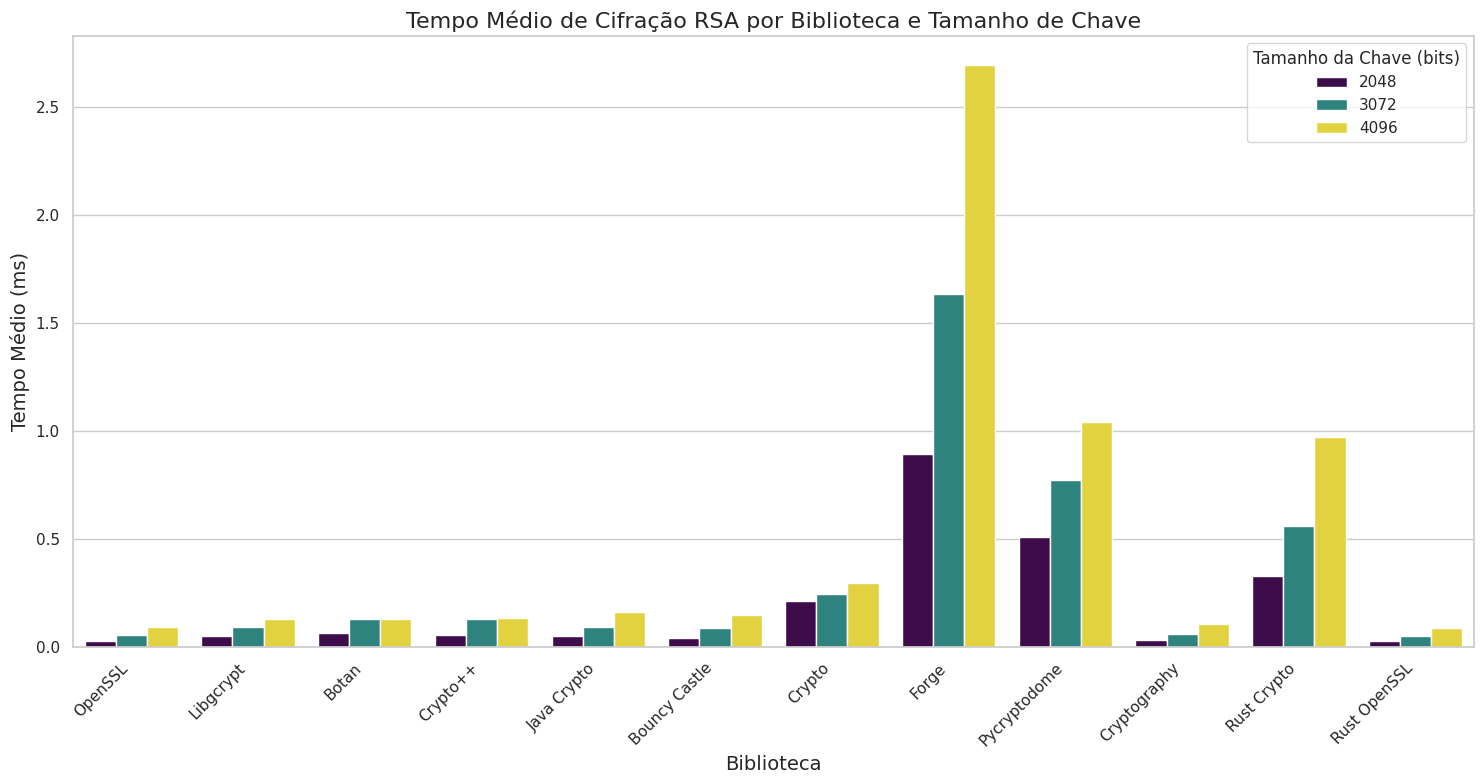

In [125]:
print("\n--- Análise: Performance de Cifração ---")
# Filtrar dados apenas para a operação de Cifração
df_cif_plot = df_completo[df_completo['Operacao'] == 'Cifração'].copy() # .copy() para evitar SettingWithCopyWarning

plt.figure(figsize=(15, 8))
sns.barplot(
    x='Biblioteca',
    y='Mean_Time',
    hue='Tamanho_Chave', # Usa o tamanho da chave para agrupar as barras
    data=df_cif_plot,
    palette='viridis',
    errorbar='sd' # Mostra o desvio padrão como barras de erro
)
plt.title('Tempo Médio de Cifração RSA por Biblioteca e Tamanho de Chave', fontsize=16)
plt.xlabel('Biblioteca', fontsize=14)
plt.ylabel('Tempo Médio (ms)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor leitura
plt.legend(title='Tamanho da Chave (bits)')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

#### Decifração


--- Análise: Performance de Decifração ---


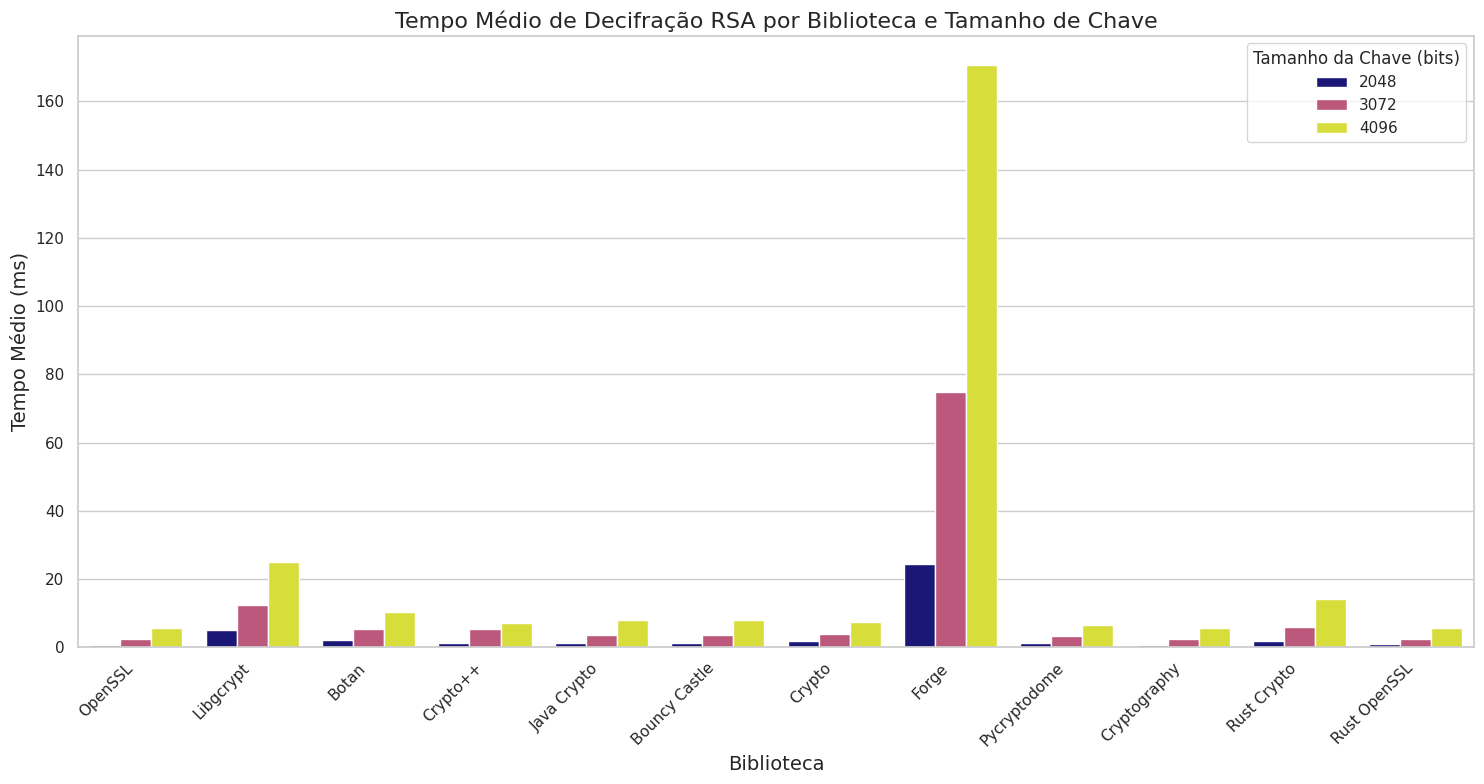

In [126]:
print("\n--- Análise: Performance de Decifração ---")
# Filtrar dados apenas para a operação de Decifração
df_decif_plot = df_completo[df_completo['Operacao'] == 'Decifração'].copy()

plt.figure(figsize=(15, 8))
sns.barplot(
    x='Biblioteca',
    y='Mean_Time',
    hue='Tamanho_Chave',
    data=df_decif_plot,
    palette='plasma',
    errorbar='sd'
)
plt.title('Tempo Médio de Decifração RSA por Biblioteca e Tamanho de Chave', fontsize=16)
plt.xlabel('Biblioteca', fontsize=14)
plt.ylabel('Tempo Médio (ms)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tamanho da Chave (bits)')
plt.tight_layout()
plt.show()

#### Geração de chaves


--- Análise: Performance de Geração de Chaves ---


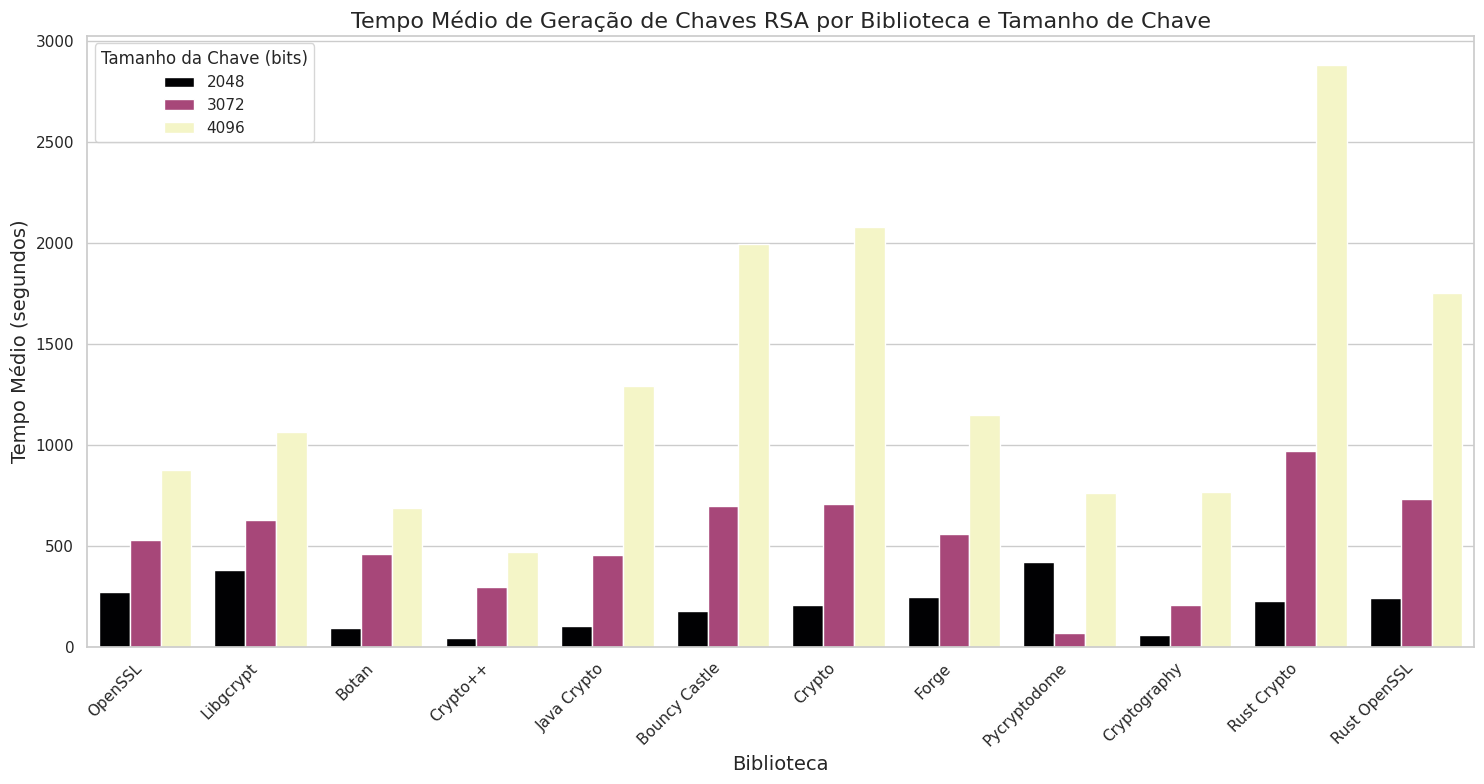

In [127]:
print("\n--- Análise: Performance de Geração de Chaves ---")
# Filtrar dados apenas para a operação de Geração de Chaves
df_geracao_plot = df_completo[df_completo['Operacao'] == 'Geração de Chaves'].copy()

plt.figure(figsize=(15, 8))
sns.barplot(
    x='Biblioteca',
    y='Mean_Time',
    hue='Tamanho_Chave',
    data=df_geracao_plot,
    palette='magma',
    errorbar='sd'
)
plt.title('Tempo Médio de Geração de Chaves RSA por Biblioteca e Tamanho de Chave', fontsize=16)
plt.xlabel('Biblioteca', fontsize=14)
plt.ylabel('Tempo Médio (segundos)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tamanho da Chave (bits)')
plt.tight_layout()
plt.show()



---




# **Aprimorando a análise de dados**

In [128]:
# Colorir os gráficos por linguagem
linguagem_map = {
    'OpenSSL': 'C',
    'Libgcrypt': 'C',
    'Botan': 'C++',
    'Crypto++': 'C++',
    'Java Crypto': 'Java',
    'Bouncy Castle': 'Java',
    'Crypto': 'JavaScript',
    'Forge': 'JavaScript',
    'Pycryptodome': 'Python',
    'Cryptography': 'Python',
    'Rust Crypto': 'Rust',
    'Rust OpenSSL': 'Rust'
}
df_completo['Linguagem'] = df_completo['Biblioteca'].map(linguagem_map)

# Definir cores para as linguagens
cores_linguagem = {
    "C": "#1f77b4",       # Azul
    "C++": "#ff7f0e",     # Laranja
    "Java": "#2ca02c",    # Verde
    "JavaScript": "#d62728", # Vermelho
    "Python": "#9467bd",  # Roxo
    "Rust": "#8c564b"     # Marrom
}

In [129]:
# Função auxiliar para geração dos gráficos
def plot_performance_chart(df_data, operation_name, key_size, output_filename, save_svg=False):
    # Filtrar dados para a operação e tamanho de chave específicos
    df_filtered = df_data[
        (df_data['Operacao'] == operation_name) &
        (df_data['Tamanho_Chave'] == key_size)
    ].copy()

    # O tempo já está em milissegundos, então usamos 'Mean_Time' diretamente
    df_filtered['Tempo (ms)'] = df_filtered['Mean_Time']

    # Ordenar por tempo para melhor visualização
    df_filtered = df_filtered.sort_values(by="Tempo (ms)", ascending=False) # Ordem decrescente para barh

    plt.figure(figsize=(15, 9))
    bars = plt.barh(
        df_filtered["Biblioteca"],
        df_filtered["Tempo (ms)"],
        color=df_filtered["Linguagem"].map(cores_linguagem),
        height=0.7, # Ajuste a altura das barras
        edgecolor='white'
    )

    # Adicionar valores nas barras
    for bar in bars:
        # Posição do texto ajustada com base na largura da barra
        plt.text(
            bar.get_width() + (df_filtered["Tempo (ms)"].max() * 0.02), # Ajuste de posição para o texto
            bar.get_y() + bar.get_height() / 2,
            f"{bar.get_width():.2f} ms", # Formatação com 2 casas decimais para milissegundos
            va='center',
            fontsize=12,
            color='black'
        )

    plt.title(f'Tempo Médio de {operation_name} (Chave {key_size} bits)', fontsize=18)
    plt.xlabel("Tempo (milissegundos)", fontsize=14)
    plt.ylabel("Biblioteca", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, df_filtered["Tempo (ms)"].max() * 1.2) # Ajusta o limite X para caber o texto
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Legenda de cores por linguagem
    legend_elements = [Patch(facecolor=cores_linguagem[lang], label=lang) for lang in cores_linguagem]
    plt.legend(
        handles=legend_elements,
        title="Linguagem",
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=12,
        title_fontsize=14
    )

    plt.tight_layout()
    if save_svg:
        plt.savefig(f"{output_filename}.svg", bbox_inches='tight', dpi=300, format='svg')
        print(f"Gráfico '{output_filename}.svg' salvo com sucesso!")
    plt.show()


--- Gerando Gráficos de Cifração ---


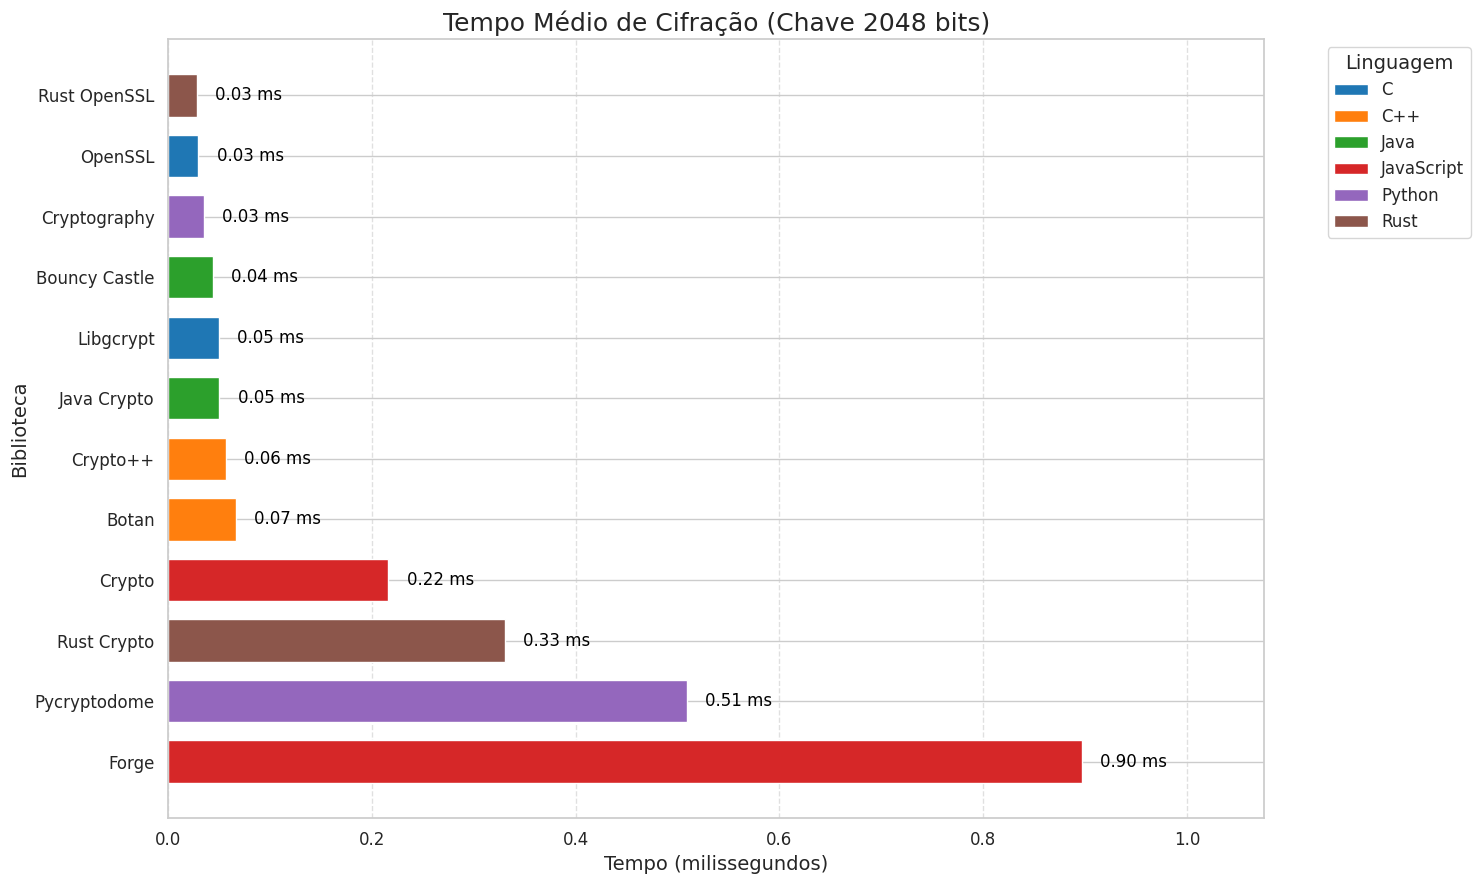

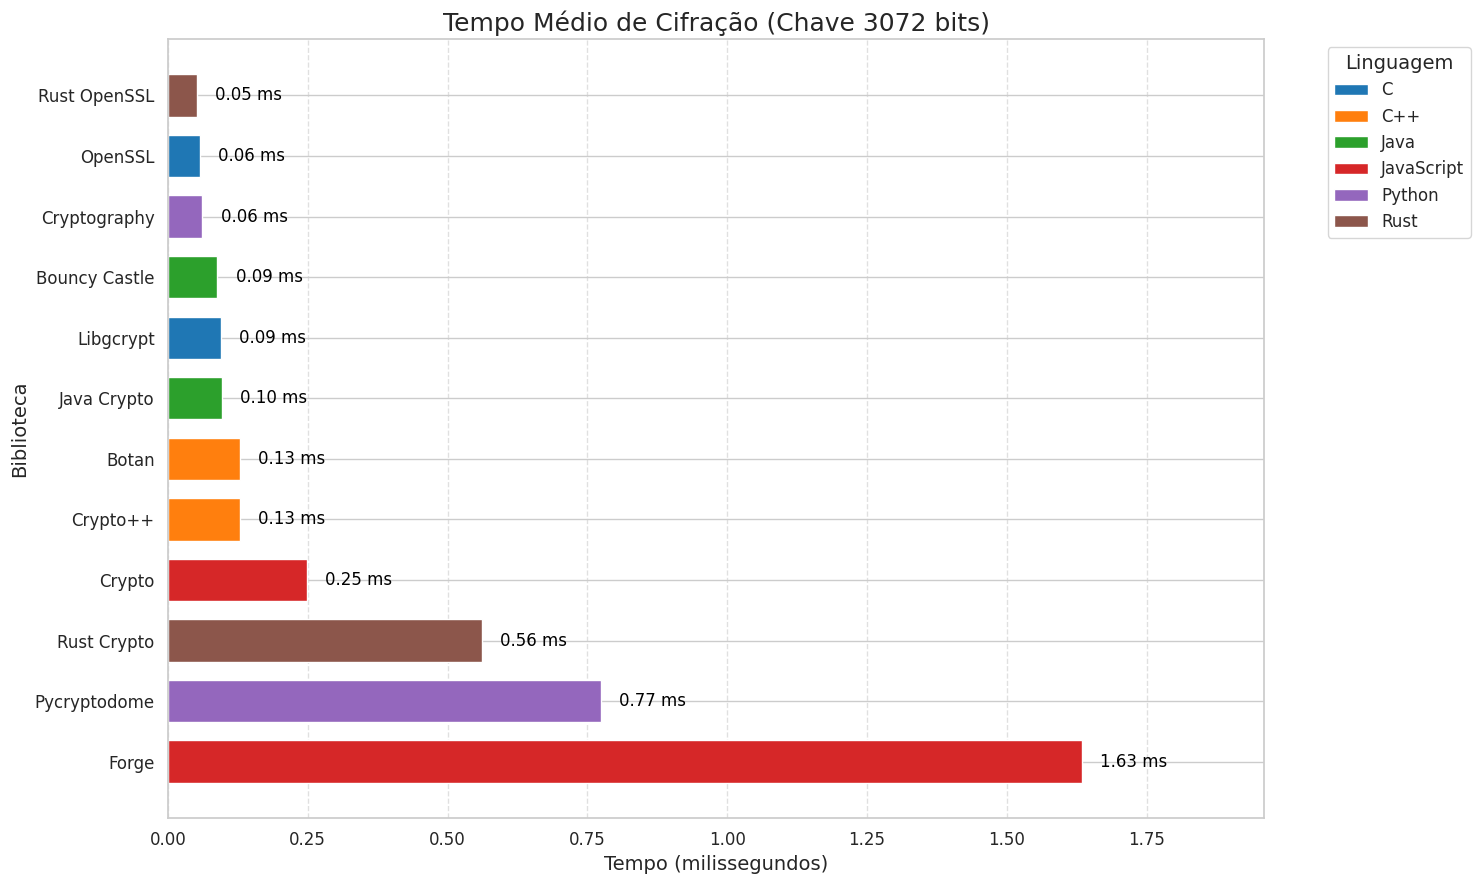

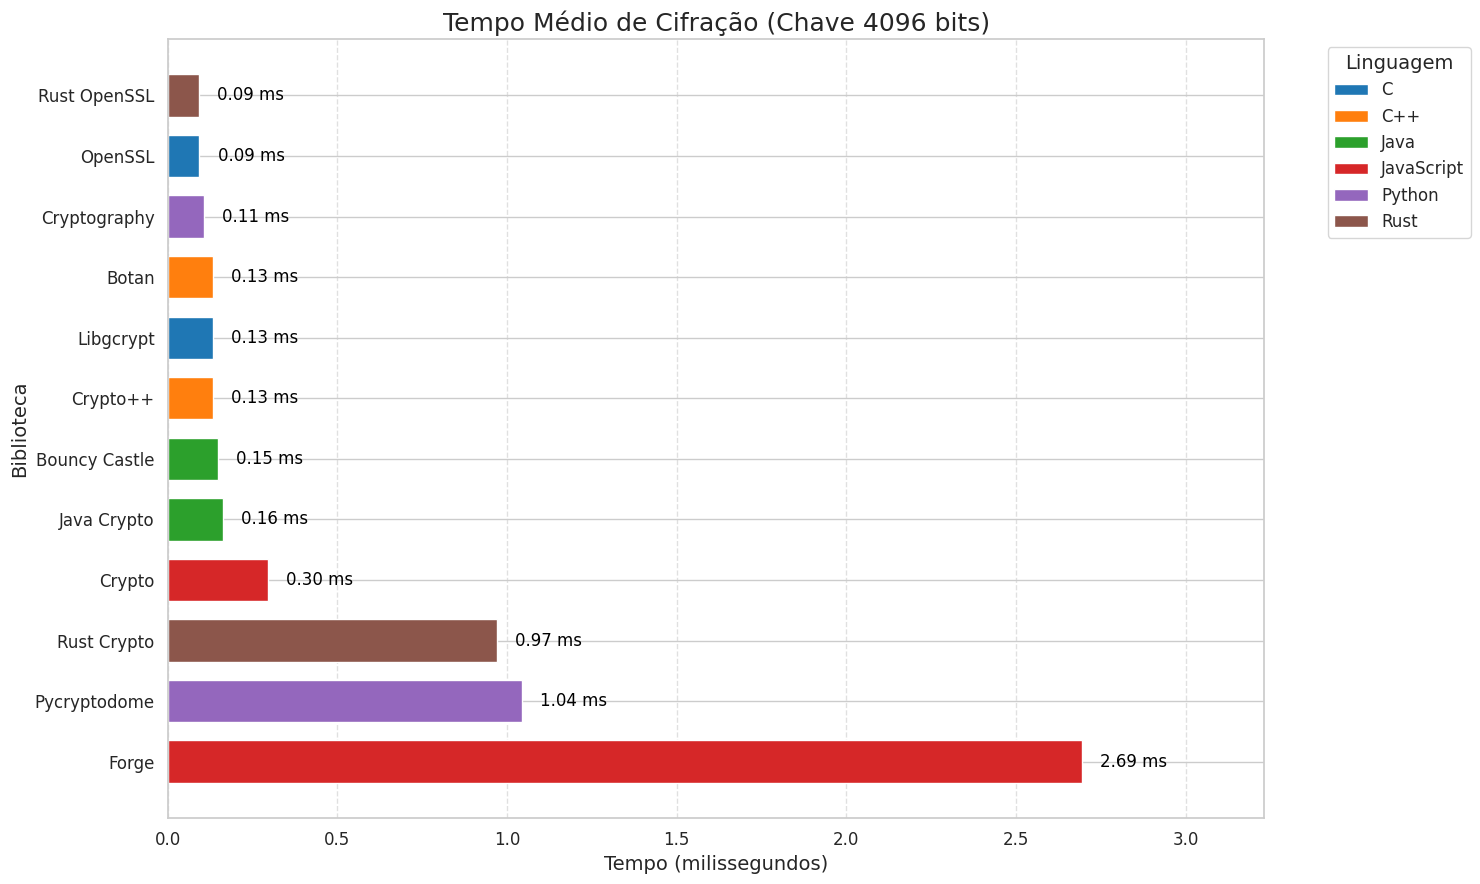

In [130]:
# Cifração
print("\n--- Gerando Gráficos de Cifração ---")
plot_performance_chart(df_completo, 'Cifração', 2048, 'cifracao_2048')
plot_performance_chart(df_completo, 'Cifração', 3072, 'cifracao_3072')
plot_performance_chart(df_completo, 'Cifração', 4096, 'cifracao_4096')


--- Gerando Gráficos de Decifração ---


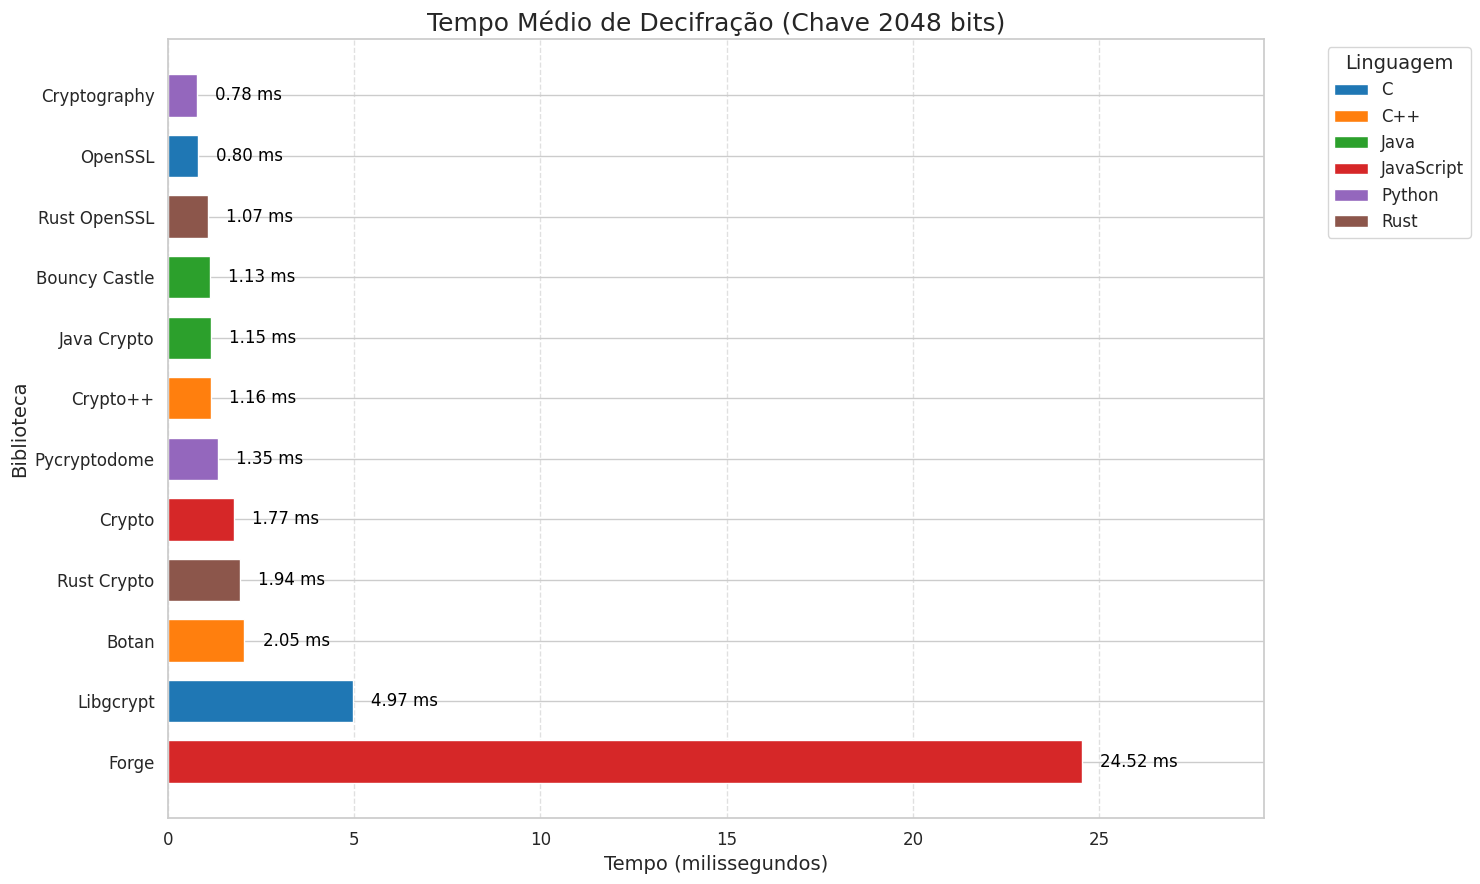

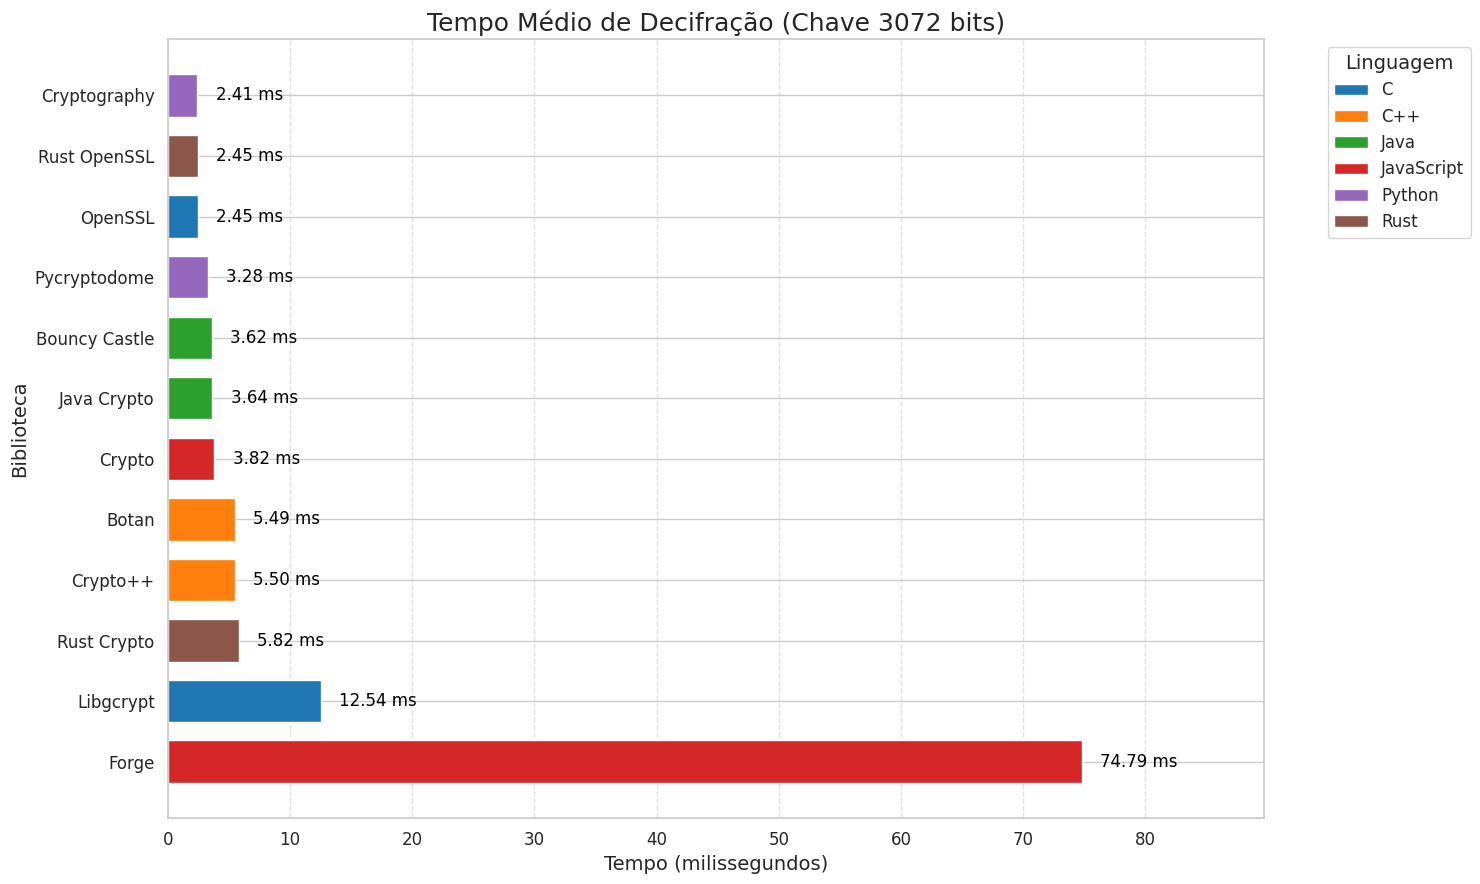

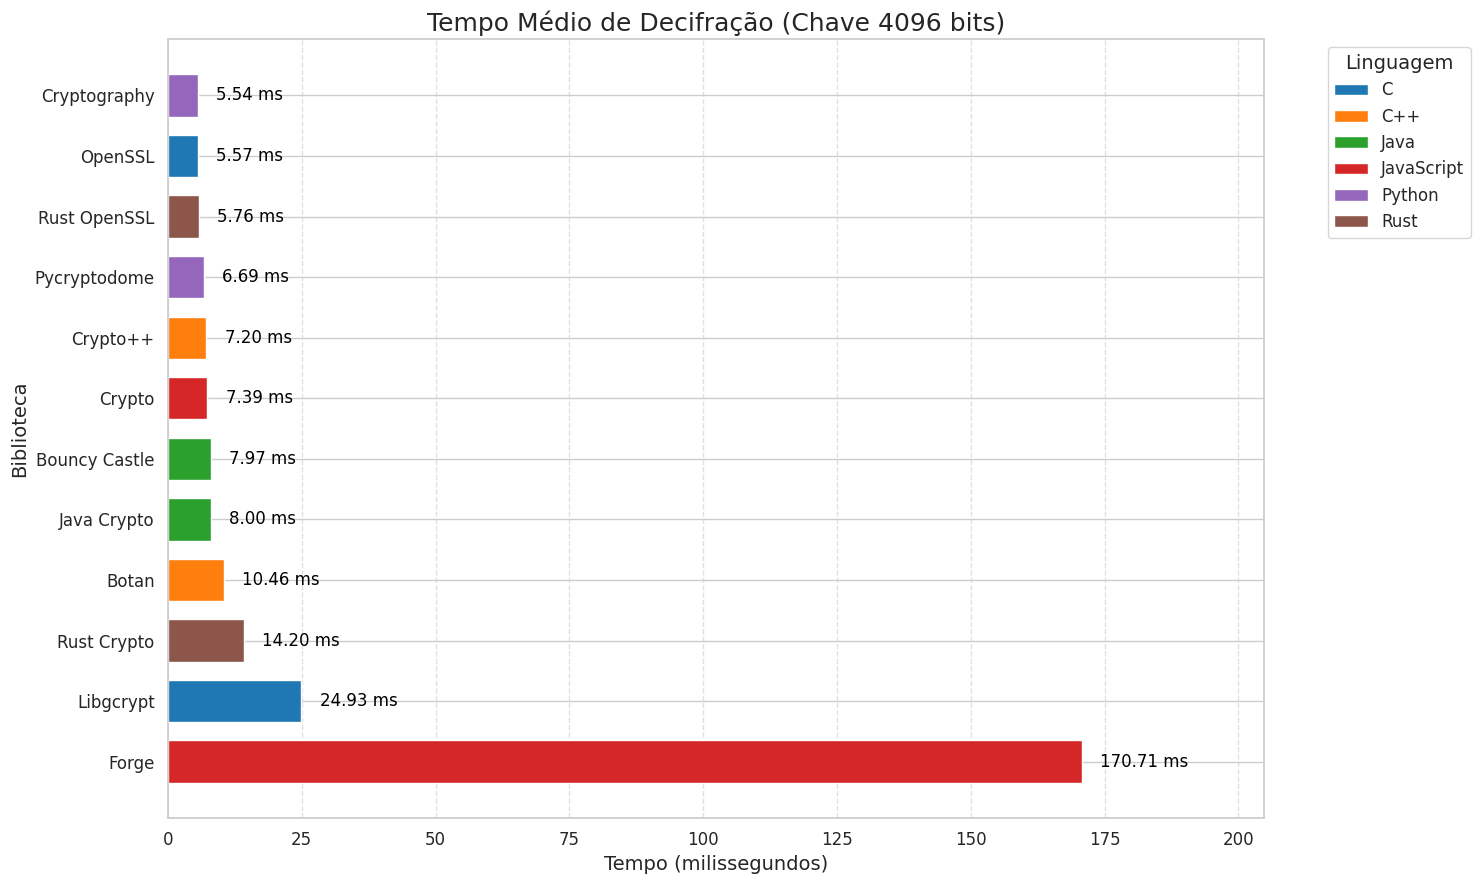

In [131]:
# Decifração
print("\n--- Gerando Gráficos de Decifração ---")
plot_performance_chart(df_completo, 'Decifração', 2048, 'decifracao_2048')
plot_performance_chart(df_completo, 'Decifração', 3072, 'decifracao_3072')
plot_performance_chart(df_completo, 'Decifração', 4096, 'decifracao_4096')


--- Gerando Gráficos de Geração de Chaves ---


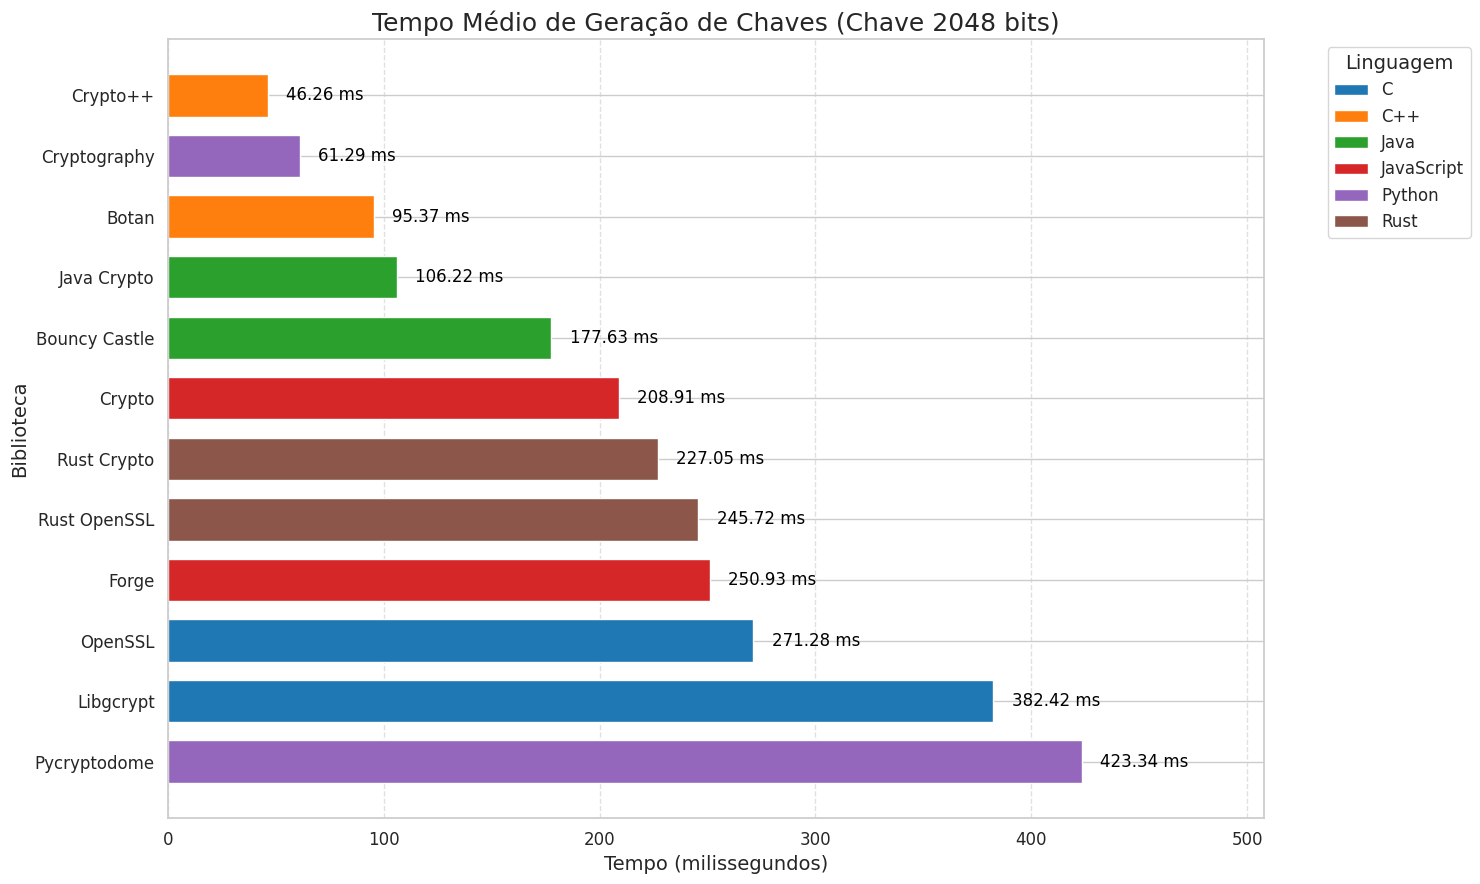

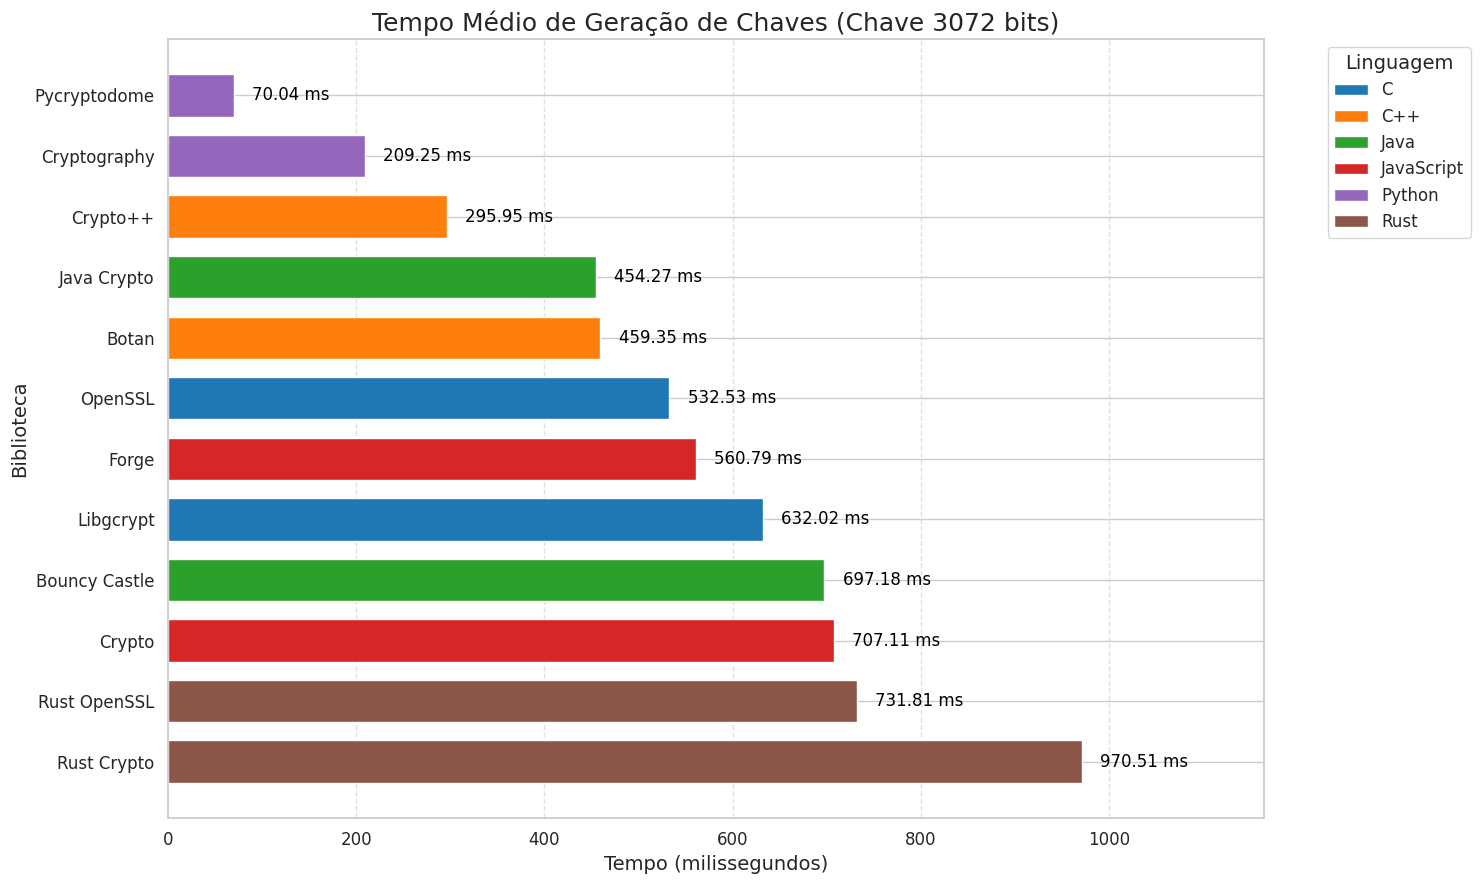

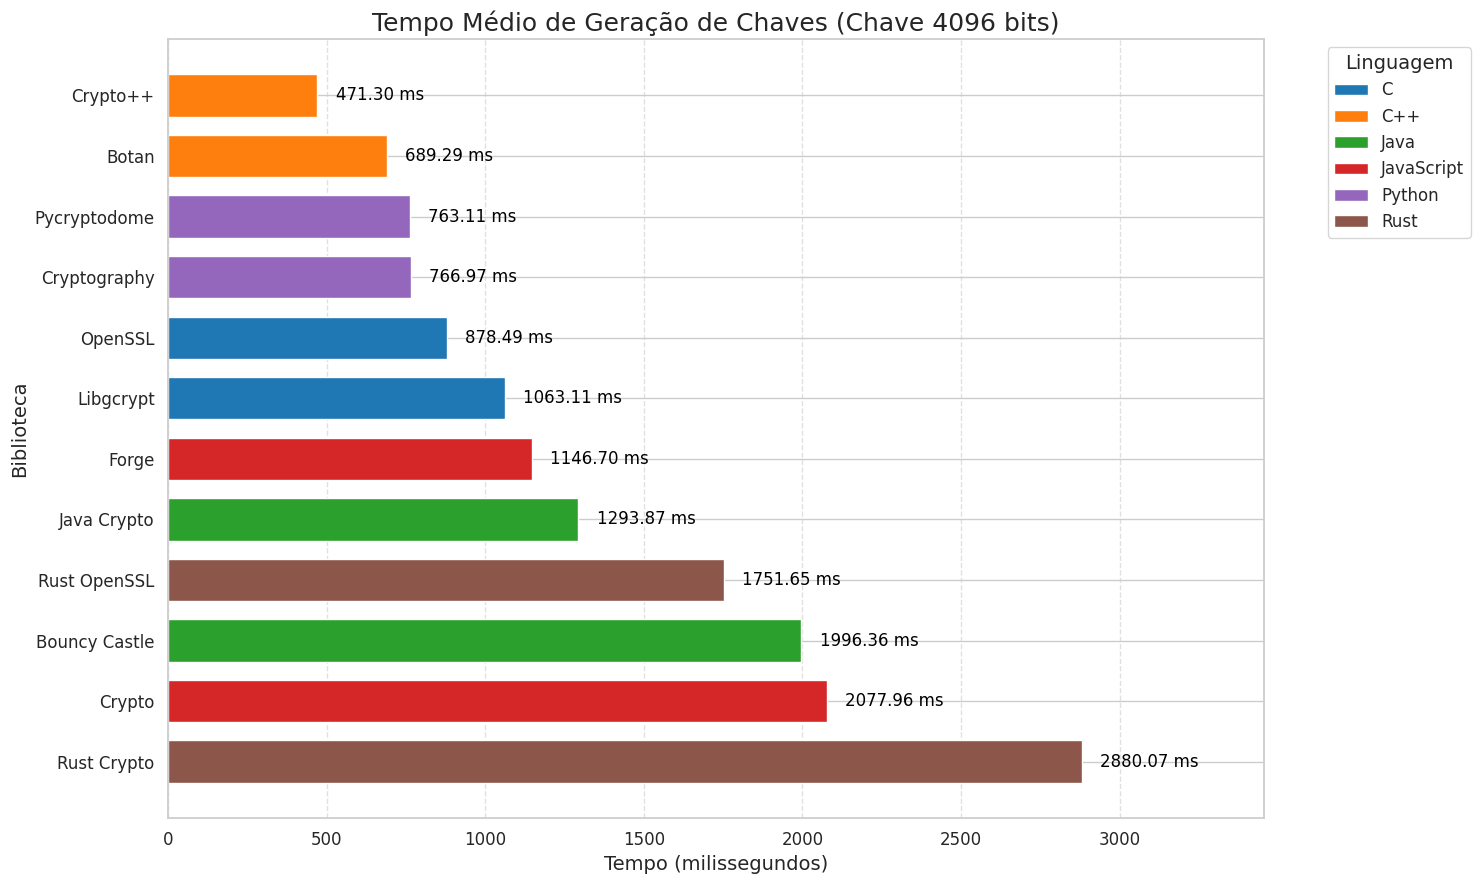

In [132]:
# Geração de Chaves
print("\n--- Gerando Gráficos de Geração de Chaves ---")
plot_performance_chart(df_completo, 'Geração de Chaves', 2048, 'geracao_chaves_2048')
plot_performance_chart(df_completo, 'Geração de Chaves', 3072, 'geracao_chaves_3072')
plot_performance_chart(df_completo, 'Geração de Chaves', 4096, 'geracao_chaves_4096')

# Salvando gráficos


--- Salvando Gráficos em formato SVG ---
Salvando gráficos de Cifração...
Gráfico 'cifracao_2048.svg' salvo com sucesso!


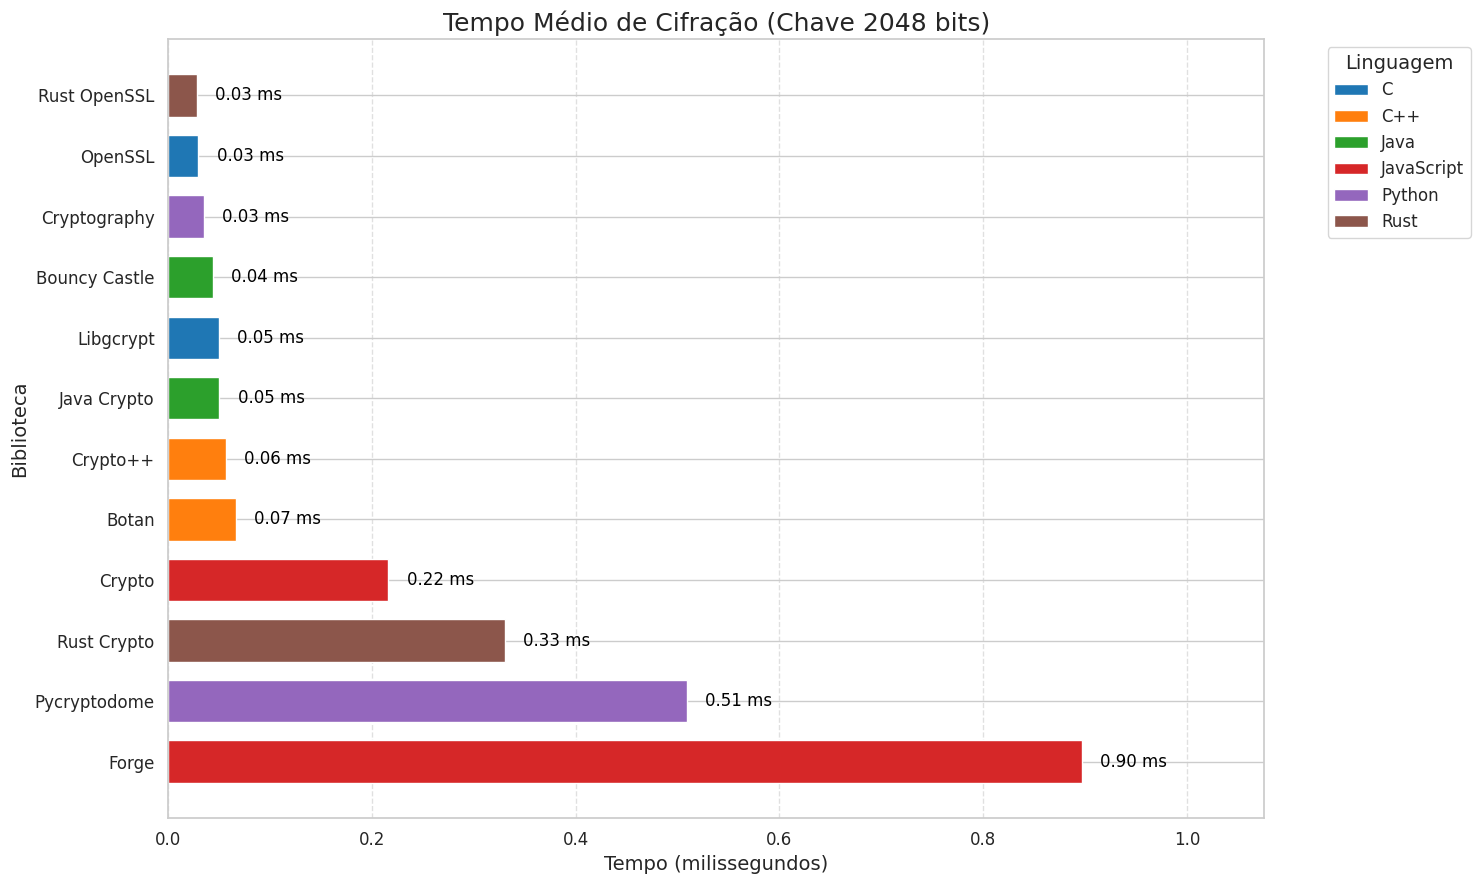

Gráfico 'cifracao_3072.svg' salvo com sucesso!


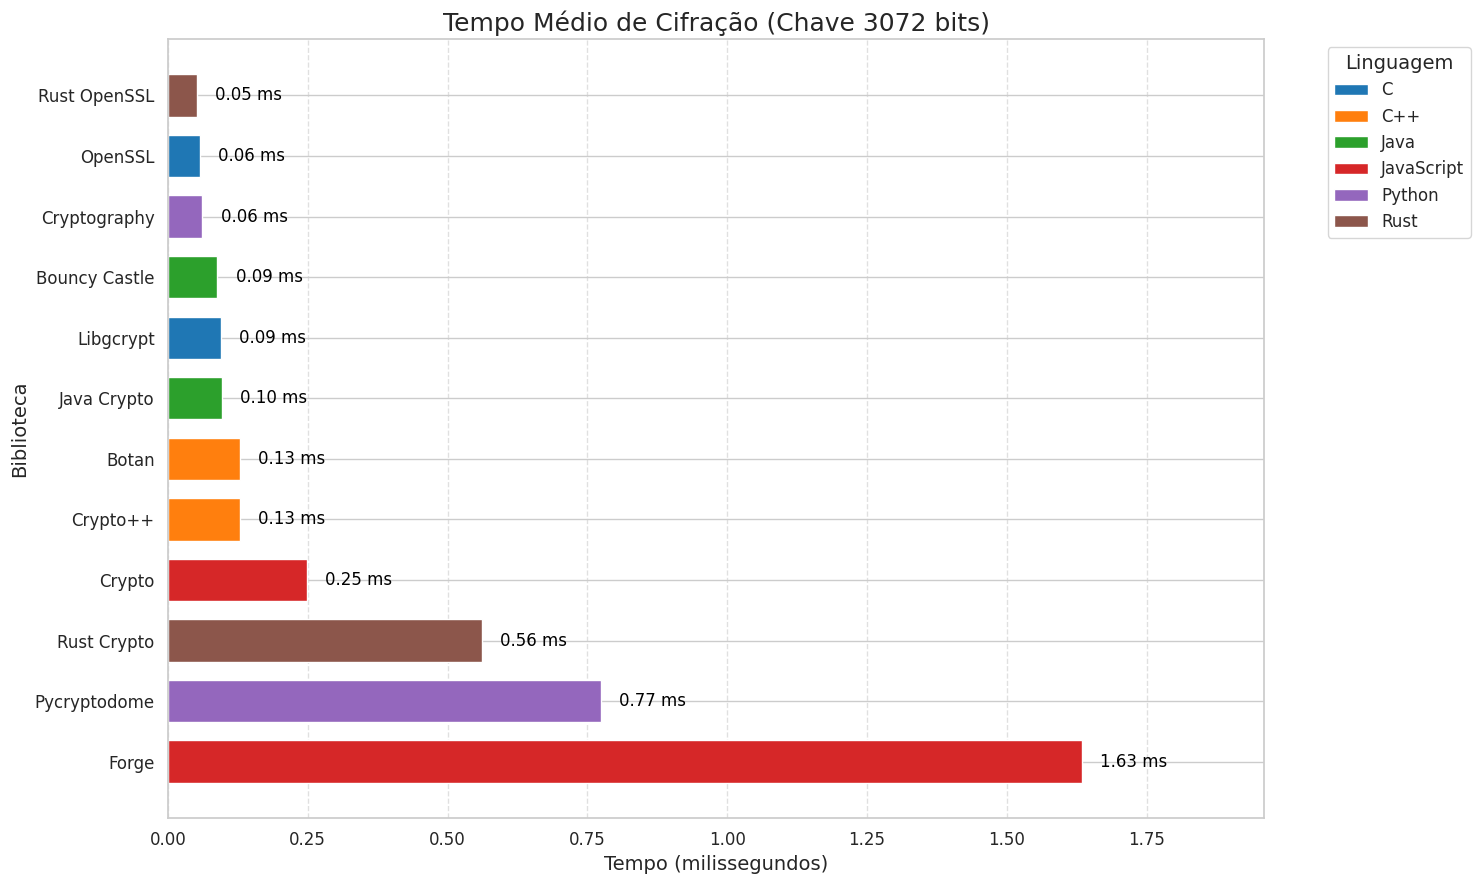

Gráfico 'cifracao_4096.svg' salvo com sucesso!


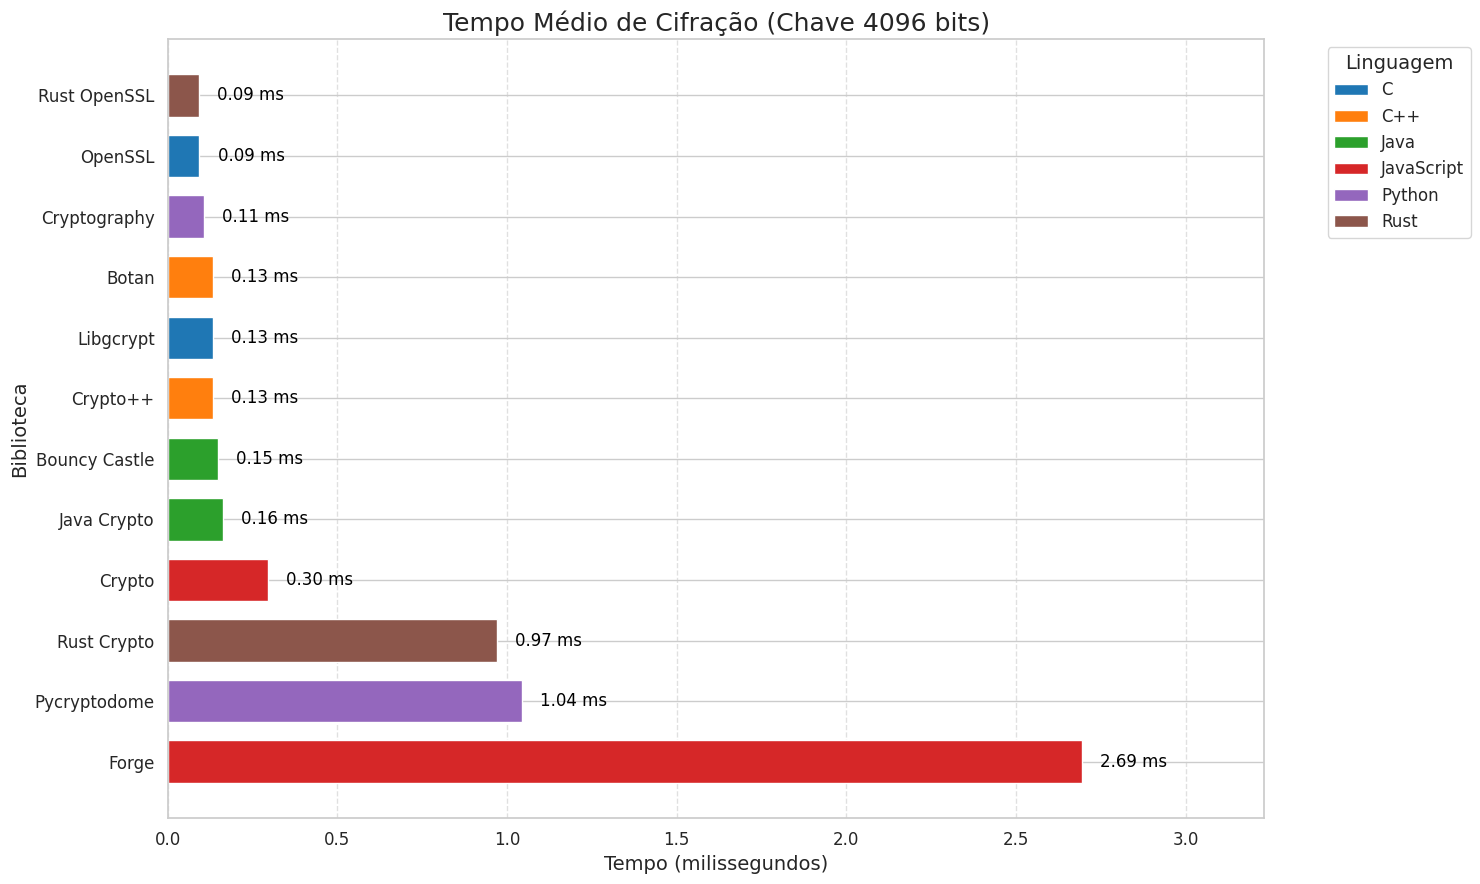

Salvando gráficos de Decifração...
Gráfico 'decifracao_2048.svg' salvo com sucesso!


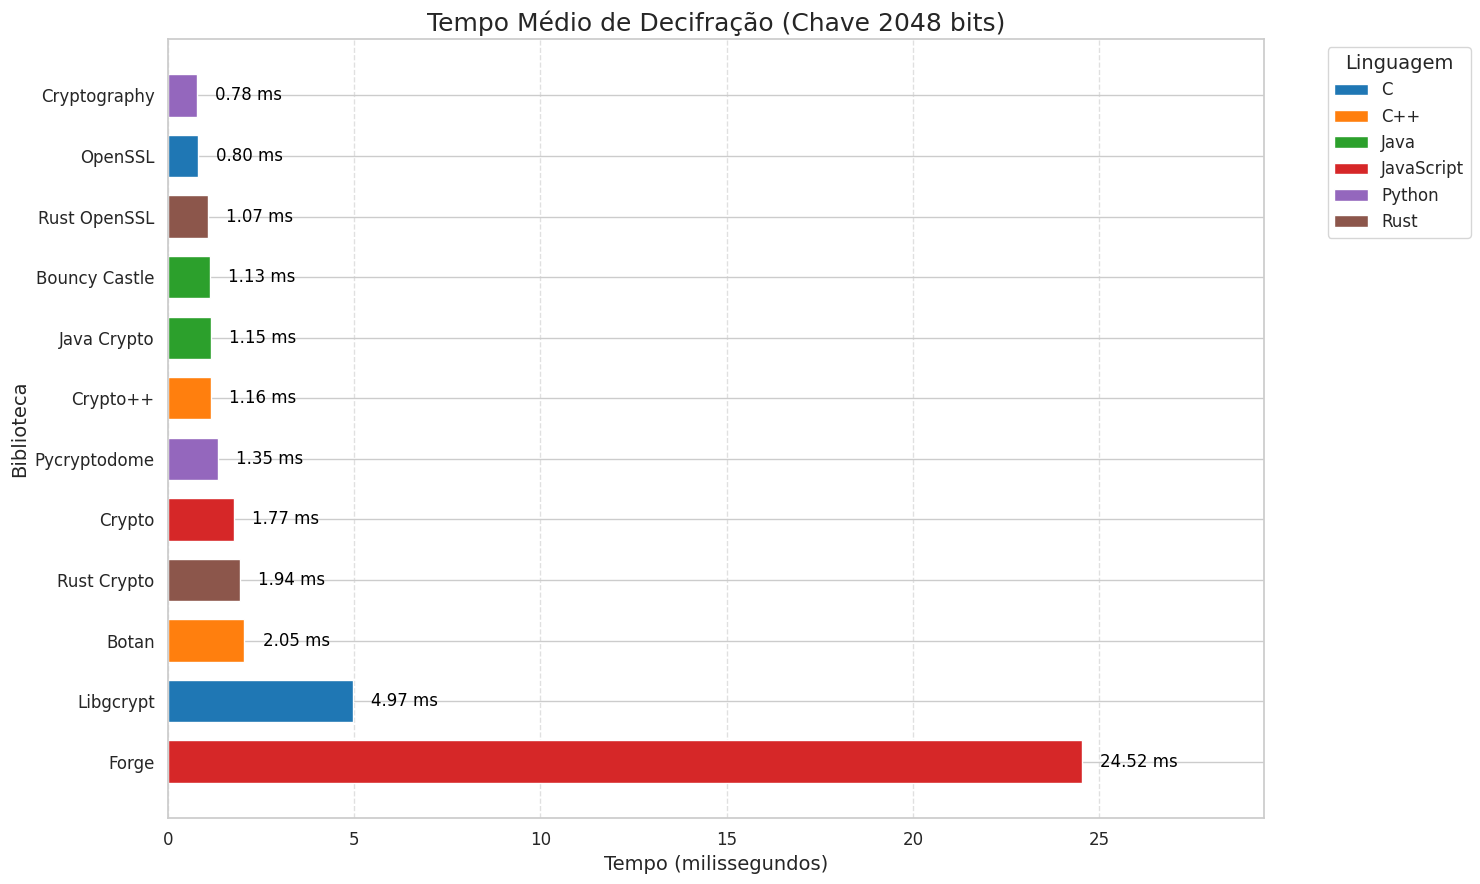

Gráfico 'decifracao_3072.svg' salvo com sucesso!


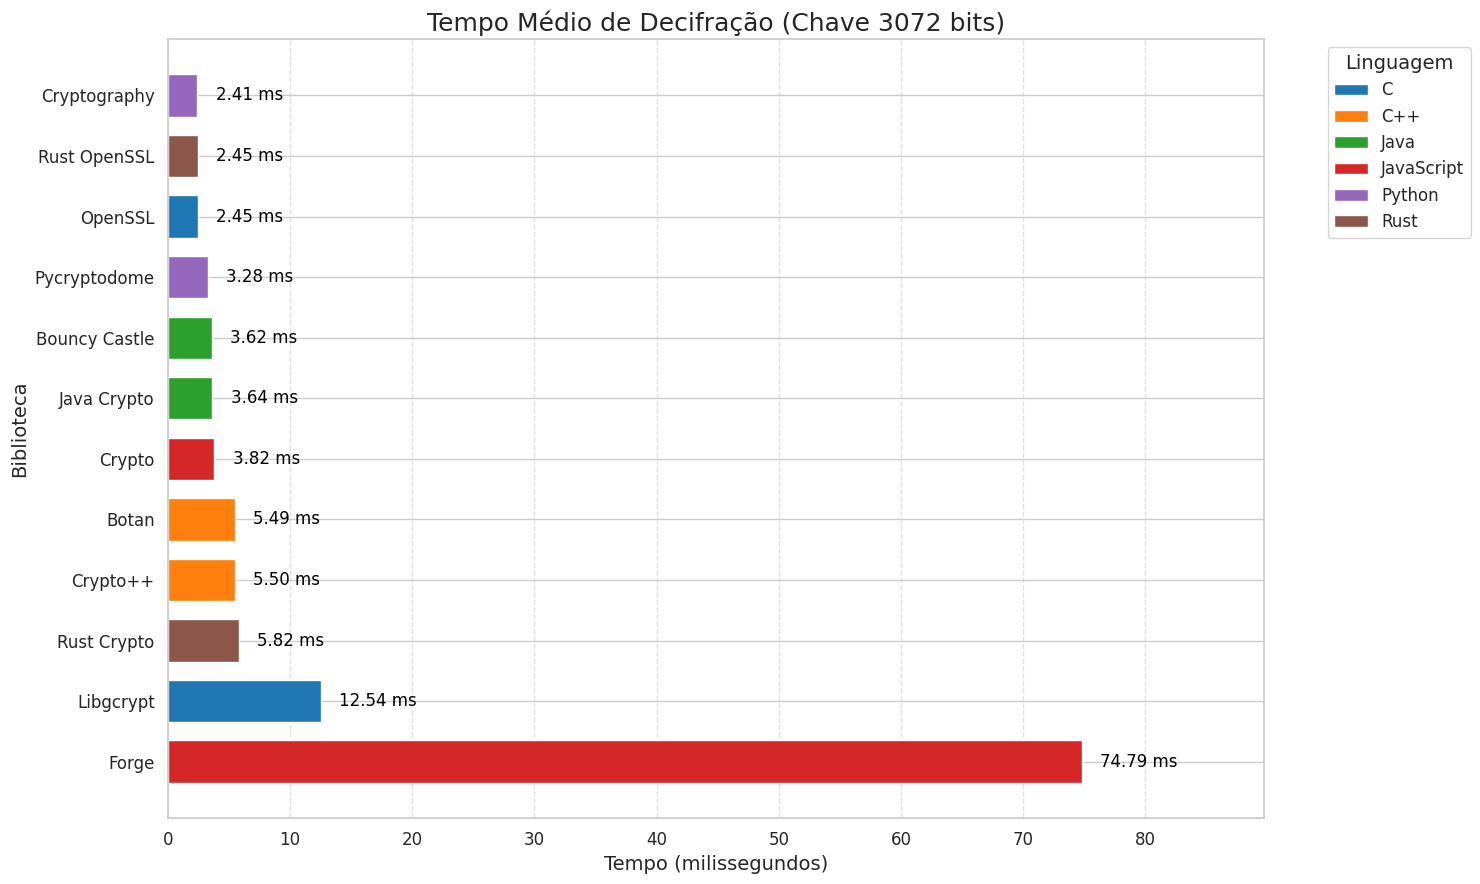

Gráfico 'decifracao_4096.svg' salvo com sucesso!


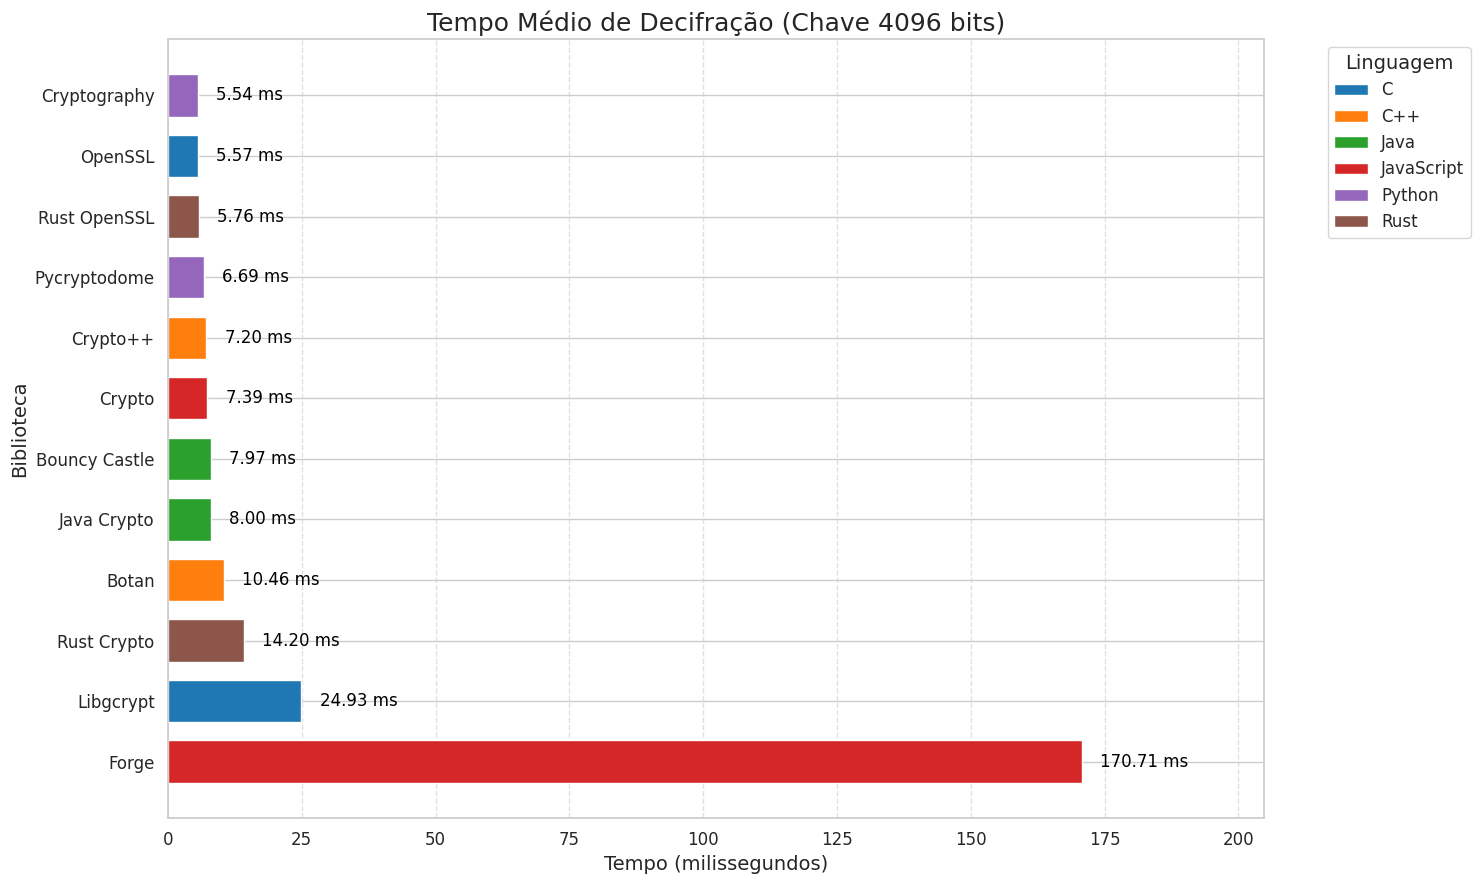

Salvando gráficos de Geração de Chaves...
Gráfico 'geracao_chaves_2048.svg' salvo com sucesso!


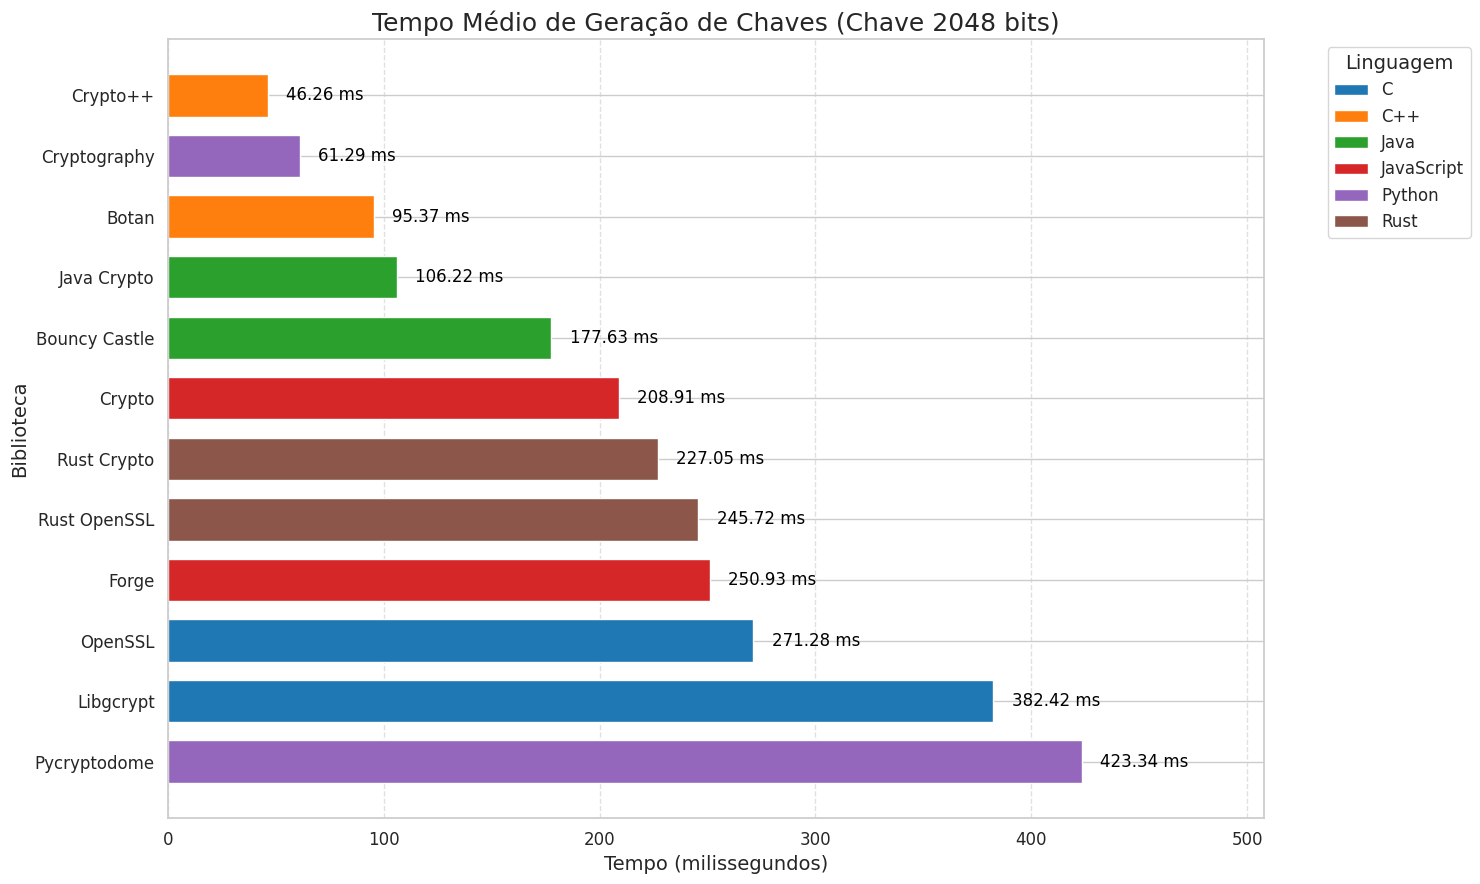

Gráfico 'geracao_chaves_3072.svg' salvo com sucesso!


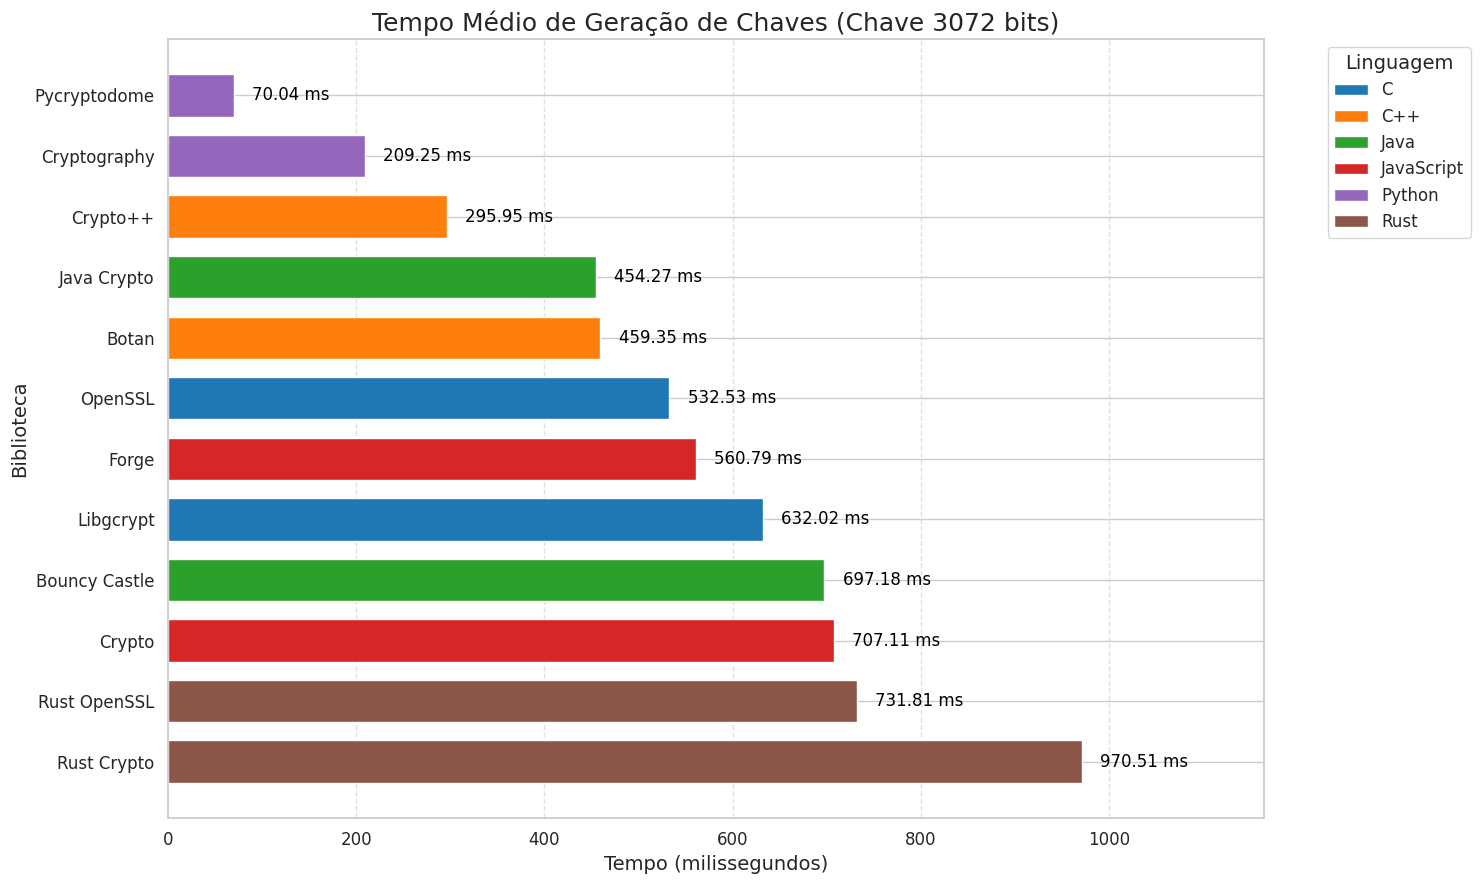

Gráfico 'geracao_chaves_4096.svg' salvo com sucesso!


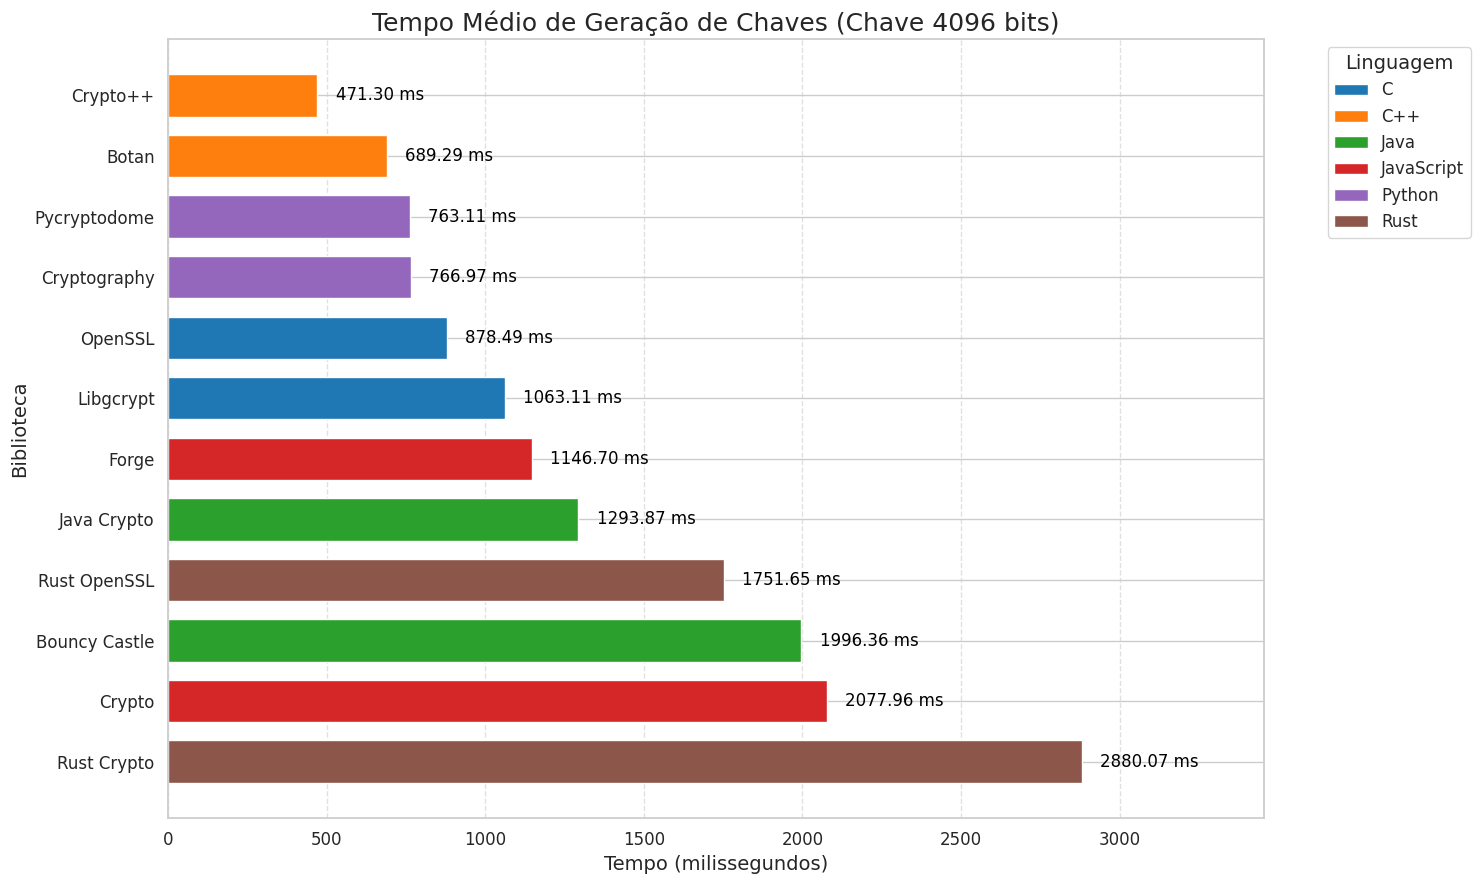

In [133]:
print("\n--- Salvando Gráficos em formato SVG ---")

# Re-gerar e salvar cada gráfico com save_svg=True
print("Salvando gráficos de Cifração...")
plot_performance_chart(df_completo, 'Cifração', 2048, 'cifracao_2048', save_svg=True)
plot_performance_chart(df_completo, 'Cifração', 3072, 'cifracao_3072', save_svg=True)
plot_performance_chart(df_completo, 'Cifração', 4096, 'cifracao_4096', save_svg=True)

print("Salvando gráficos de Decifração...")
plot_performance_chart(df_completo, 'Decifração', 2048, 'decifracao_2048', save_svg=True)
plot_performance_chart(df_completo, 'Decifração', 3072, 'decifracao_3072', save_svg=True)
plot_performance_chart(df_completo, 'Decifração', 4096, 'decifracao_4096', save_svg=True)

print("Salvando gráficos de Geração de Chaves...")
plot_performance_chart(df_completo, 'Geração de Chaves', 2048, 'geracao_chaves_2048', save_svg=True)
plot_performance_chart(df_completo, 'Geração de Chaves', 3072, 'geracao_chaves_3072', save_svg=True)
plot_performance_chart(df_completo, 'Geração de Chaves', 4096, 'geracao_chaves_4096', save_svg=True)
